In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv("ETH-USD.csv")

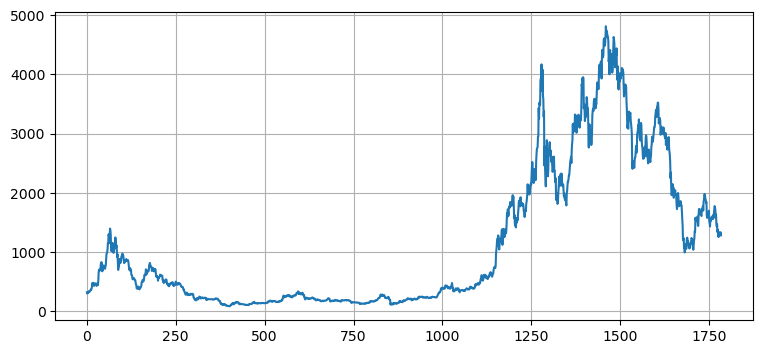

In [3]:
plt.figure(figsize=(9,4))
plt.grid(True)
plt.plot(df.index, df['adjclose'])

In [4]:
# Converting our 'X' i.e. the Days column in to date-time format
df['timestamp'] = pd.to_datetime(df["timestamp"])

In [5]:
df.set_index('timestamp', inplace = True)

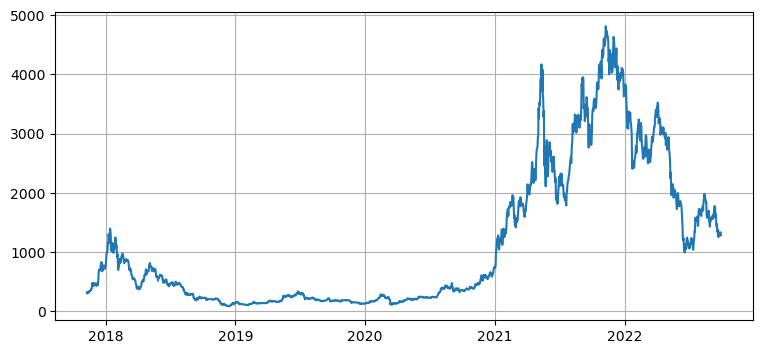

In [6]:
plt.figure(figsize=(9,4))
plt.grid(True)
plt.plot(df['adjclose'])

Text(0, 0.5, 'price (in USD)')

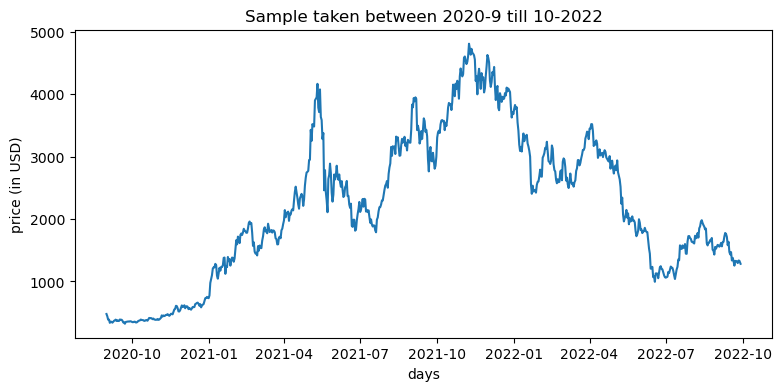

In [7]:
plt.figure(figsize=(9,4))
df = df.loc['2020-9' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-9 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [8]:
df['adjclose']

timestamp
2020-09-01 00:00:00     477.051910
2020-09-02 00:00:00     440.040497
2020-09-03 00:00:00     385.671936
2020-09-04 00:00:00     388.241150
2020-09-05 00:00:00     335.260071
                          ...     
2022-09-24 00:00:00    1317.993286
2022-09-25 00:00:00    1294.216797
2022-09-26 00:00:00    1335.320190
2022-09-27 00:00:00    1330.127686
2022-09-28 08:54:00    1281.931763
Name: adjclose, Length: 758, dtype: float64

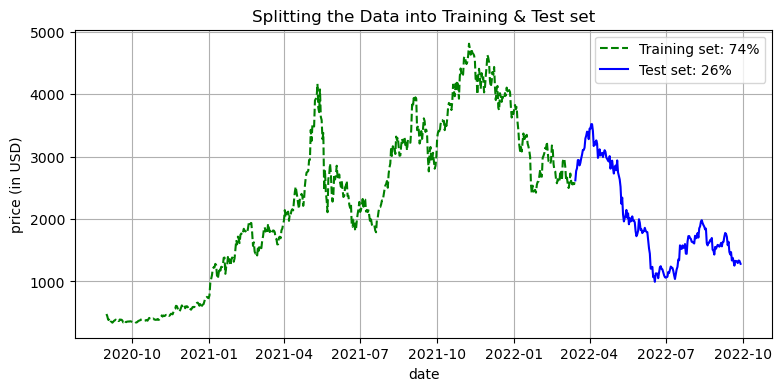

In [9]:
plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.74)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 74%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 26%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [10]:
# training_data = len(training_data)
# testing_da
# # testing_data
X_train = len(df[0:to_row]['adjclose'].values)
X_train = np.arange(X_train).reshape(-1,1)
Y_train = list(df[0:to_row]['adjclose'])
Y_train = np.array(Y_train).reshape(-1,1)

Y_test  =list(df[to_row:]['adjclose'])
Y_test  = np.array(Y_test).reshape(-1,1)
X_test  = len(df[to_row:]['adjclose'].values)
X_test  = np.arange(X_test).reshape(-1,1)

In [11]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
st_scalerX = MinMaxScaler()
st_scalerY = MinMaxScaler()
#st_scaler = StandardScaler()

X_train_scaled = st_scalerX.fit_transform(X_train)
Y_train_scaled = st_scalerY.fit_transform(Y_train)
X_test_scaled  = st_scalerX.fit_transform(X_test)
Y_test_scaled  = st_scalerY.fit_transform(Y_test)



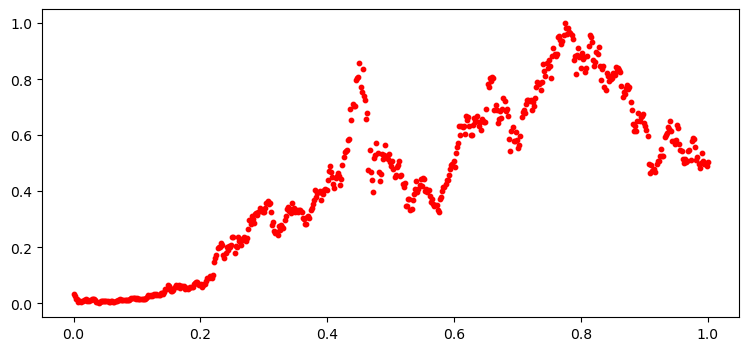

In [12]:
# Normalized values
plt.figure(figsize=(9,4))
plt.scatter(X_train_scaled,Y_train_scaled,color='r', s=10)

In [13]:
from sklearn.svm import SVR       # kernalis a way of computing dot product of two vectors in some feature space
fitting = SVR(kernel ='rbf')   # rbf --> Radial Basis Function used for best fit of curve 
fitting.fit(X_train_scaled,Y_train_scaled.ravel())


SVR()

In [14]:
# Calculating the Score
score = fitting.score(X_train_scaled,Y_train_scaled)*100
score

91.87097694539624

In [15]:
Y_predicted = fitting.predict(X_train_scaled)

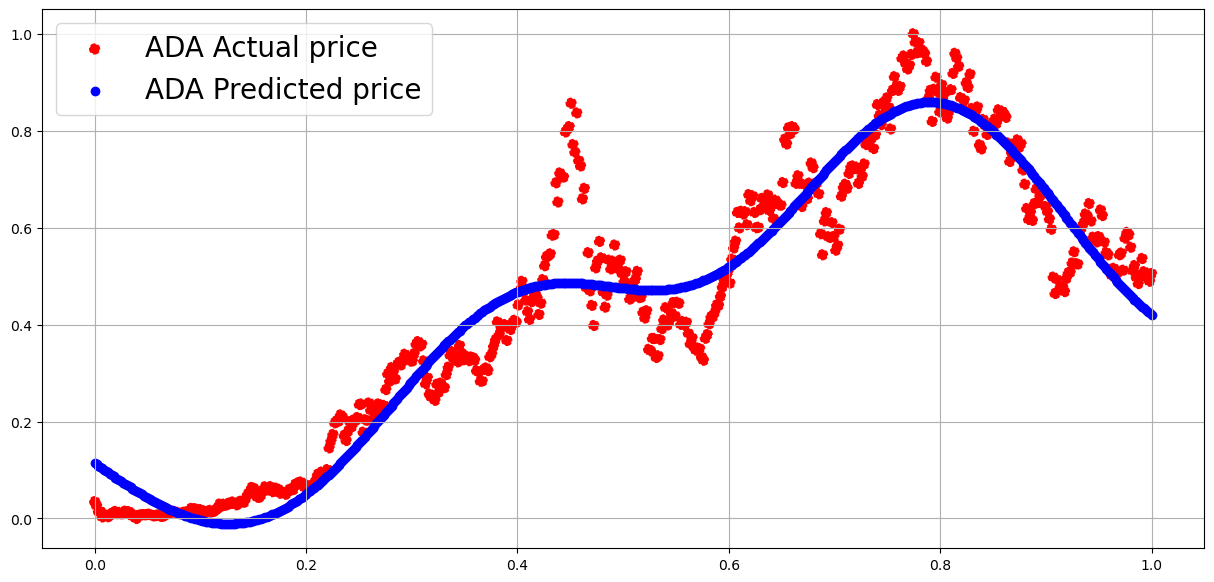

In [35]:
# Performance
import matplotlib.pylab as plt
plt.figure(figsize=(15,7))
plt.grid(True)
plt.scatter(X_train_scaled,Y_train_scaled,s=50,marker='o',color = 'r',linestyle ='dashed',label = "ADA Actual price")
plt.scatter(X_train_scaled,Y_predicted,color = 'b',label = 'ADA Predicted price')

plt.legend(fontsize="20")
plt.show()

In [17]:
# Reverse Transformation of the Training and Test Set
Y_cap_inverse = st_scalerY.inverse_transform(fitting.predict(X_test_scaled).reshape(-1,1))
len(Y_cap_inverse)

198

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,explained_variance_score

In [19]:
print("Computing the R-squared value:")
r2_score = r2_score(Y_test,Y_cap_inverse)

print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-2.493762482449747


In [20]:
# Computing the Score
sc = fitting.score(Y_test,Y_cap_inverse)*100
sc

-896.82148570702

In [21]:
#Mean absolute error
print(mean_absolute_error(Y_test,Y_cap_inverse))

1208.4918545541238


In [22]:
# MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(Y_cap_inverse[:]) - np.array(Y_test)) / np.abs(Y_test))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.6418178820140903


In [23]:
# Computing ROOT MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Y_test,Y_cap_inverse)
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error:\n")
print(RMSE)

Root Mean Squared Error:

1342.1199921803607


In [24]:
#X_test_inverse = st_scalerY.inverse_transform(X_test_scaled).reshape(-1,1)
#Y_test_inverse = st_scalerY.inverse_transform(Y_test_scaled).reshape(-1,1)
#Y_test_inverse

In [25]:
#Y_test

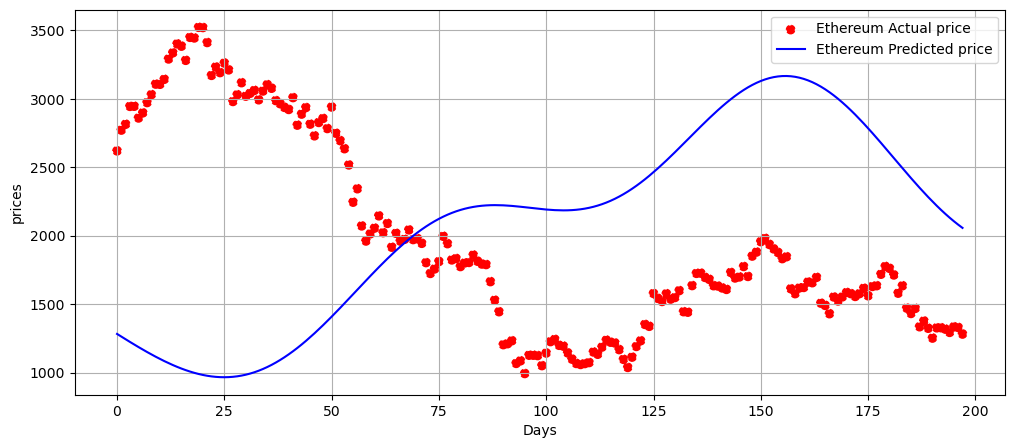

In [26]:

plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(X_test,Y_test,marker='o',color = 'r',linestyle ='dashed',label = "Ethereum Actual price")
plt.plot(X_test,Y_cap_inverse,color = 'b',label = 'Ethereum Predicted price')

plt.legend()
plt.xlabel('Days')
plt.ylabel('prices')
plt.show()

In [27]:
test_set = df[to_row:][0:10]['adjclose']
test_set= test_set.values
test_set = np.array(test_set).reshape(-1,1)
test_set

array([[2620.149658],
       [2772.055664],
       [2814.854492],
       [2945.343018],
       [2946.25708 ],
       [2860.459229],
       [2897.976563],
       [2973.131104],
       [3031.067139],
       [3108.062012]])

In [28]:
Y_cap_inverse[:10]

array([[1282.30428732],
       [1262.67595617],
       [1243.20959654],
       [1223.95480444],
       [1204.96284803],
       [1186.28653673],
       [1167.98007557],
       [1150.09890491],
       [1132.69952563],
       [1115.83931008]])

In [29]:
# performance Evaluation of 10 days Predictions
ten_days_pred = Y_cap_inverse[:10]

In [30]:
print("Computing the R-squared value:")
#r2_scored = r2_score(ten_days_pred,test_set)
#print(f'r2_score of 10 days predictions:{r2_scored}')

Computing the R-squared value:


In [31]:
# Mean absolute error
Mean_absolute_error = mean_absolute_error(ten_days_pred,test_set)
print(f'Mean_Absolute_Error of 10 days predictions:{Mean_absolute_error}')

Mean_Absolute_Error of 10 days predictions:1699.9344113592233


In [32]:
# MEAN ABSOLUTE PERCENTAGE ERROR
MAP = np.mean(np.abs(np.array(ten_days_pred) - np.array(test_set)) / np.abs(test_set))
print(f'Mean_Absolute_Percentage_Error of 10 days predictions:{MAP}')

Mean_Absolute_Percentage_Error of 10 days predictions:0.5851606144336425


In [33]:
# Computing ROOT MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(test_set,ten_days_pred)
RMS = math.sqrt(MSE)
print("Root Mean Squared Error of 10 days predictions:\n")
print(RMS)

Root Mean Squared Error of 10 days predictions:

1709.5422585685747


In [34]:
# Calculating the Score
score = fitting.score(test_set,ten_days_pred)*100

score

-50427.3761677712